<a href="https://colab.research.google.com/github/etmcrae/Who-Got-DOGEd-/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

looks at DOGE contracts file and detects words appearing in them

In [66]:
import numpy as np
import pandas as pd
import nltk

nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
nltk.download('wordnet')
pd.options.display.max_columns = 100

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# open contracts from google drive

from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/

contracts = pd.read_csv('/content/drive/MyDrive/DOGE/contracts.csv')
print(contracts.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 2025-GIS-Services-Proposal-Whats-Known-LLC.pdf
 Brand
'Colab Notebooks'
 Contracts
 Data
 DOGE
'DOGE SCRAPE.gscript'
 EMCRAE-CL.docx
 EMCRAE-CL.pdf
 Financial
'Reimbursement and additional details.pdf'
'Request Support.gform'
 Resources.gsheet
'Sales Invoice - PSI1325458.gdoc'
'Sales Invoice - PSI1325458.pdf'
'Untitled project.gscript'
 USFTranscript_EMILYMCRAE.pdf
 wireframe.drawio
             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   

                           vendor         value  \
0         DELOITTE CONSULTING LLP  7.259739e+06   
1        

In [68]:
df = contracts.copy()

In [69]:
def clean_text(description):
  description = re.sub(r"(\n|'s|'| )+", " ", description)
  description = text.lower()
  description = re.sub(r'\d+', '', description) # this removes numbers
  unavailable_legal= r"\b(Unavailable for legal reasons)\b" #removes unavailable for legal reasons
  description = re.sub(unavailable_legal, '', description, flags=re.IGNORECASE) #removes unavailable for legal reasons
  unavailable= r"\b(Unavailable)\b" #removes unavailable
  description = re.sub(unavailable, '', description, flags=re.IGNORECASE) #removes unavailable
  description = re.sub(r'[^\w\s]', '', description) #removes punctuation
  return description
df['description'] = df['description'].apply(clean_description)

def remove_agency_from_description(row):
    agency = row['agency'].lower()  # Convert agency to lowercase for case-insensitive matching
    description = row['description']
    description = description.replace(agency, "")  # Remove the agency from the description
    return description

df['description'] = df.apply(remove_agency_from_description, axis=1)

print(df.head(10))

             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   
5     Unavailable                                    USAID   
6  75D30120C09934  Department of Health and Human Services   
7  75D30120F09636  Department of Health and Human Services   
8  75D30122C15665  Department of Health and Human Services   
9  75D30124C20336  Department of Health and Human Services   

                                              vendor         value  \
0                            DELOITTE CONSULTING LLP  7.259739e+06   
1                                FI CONSULTING, INC.  2.992678e+06   
2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
3                                    

In [70]:
# Removing stopwords, which are transitional words such as 'and', 'they', 'if'
# from the description column

stop_words = set(nltk.corpus.stopwords.words('english'))

def remove_stopwords(description):
    words = description.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['description'] = df['description'].apply(remove_stopwords)

print(df.head(10))

             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   
5     Unavailable                                    USAID   
6  75D30120C09934  Department of Health and Human Services   
7  75D30120F09636  Department of Health and Human Services   
8  75D30122C15665  Department of Health and Human Services   
9  75D30124C20336  Department of Health and Human Services   

                                              vendor         value  \
0                            DELOITTE CONSULTING LLP  7.259739e+06   
1                                FI CONSULTING, INC.  2.992678e+06   
2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
3                                    

In [71]:
def singularize_text(description):
      blob = TextBlob(str(description))
      word = description.split()
      singularized_words = [word.singularize() for word in blob.words]
      return " ".join(singularized_words)
df['description'] = df['description'].apply(singularize_text)
print(df.head(10))

             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   
5     Unavailable                                    USAID   
6  75D30120C09934  Department of Health and Human Services   
7  75D30120F09636  Department of Health and Human Services   
8  75D30122C15665  Department of Health and Human Services   
9  75D30124C20336  Department of Health and Human Services   

                                              vendor         value  \
0                            DELOITTE CONSULTING LLP  7.259739e+06   
1                                FI CONSULTING, INC.  2.992678e+06   
2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
3                                    

In [72]:
def stem_words(description):
      blob = TextBlob(str(description))
      word = description.split()
      stem_words = [word.stem() for word in blob.words]
      return " ".join(stem_words)
df['description'] = df['description'].apply(stem_words)
print(df.head(10))

             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   
5     Unavailable                                    USAID   
6  75D30120C09934  Department of Health and Human Services   
7  75D30120F09636  Department of Health and Human Services   
8  75D30122C15665  Department of Health and Human Services   
9  75D30124C20336  Department of Health and Human Services   

                                              vendor         value  \
0                            DELOITTE CONSULTING LLP  7.259739e+06   
1                                FI CONSULTING, INC.  2.992678e+06   
2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
3                                    

In [73]:
def lem_words(description):
      blob = TextBlob(str(description))
      word = description.split()
      lem_words = [word.lemmatize() for word in blob.words]
      return " ".join(lem_words)
df['description'] = df['description'].apply(lem_words)
print(df.head(10))

             piid                                   agency  \
0  2032H824F00058                   Department of Treasury   
1  20341522F00039                   Department of Treasury   
2  75D30124F19709  Department of Health and Human Services   
3     Unavailable                                    USAID   
4   95170024C0273    United States Agency for Global Media   
5     Unavailable                                    USAID   
6  75D30120C09934  Department of Health and Human Services   
7  75D30120F09636  Department of Health and Human Services   
8  75D30122C15665  Department of Health and Human Services   
9  75D30124C20336  Department of Health and Human Services   

                                              vendor         value  \
0                            DELOITTE CONSULTING LLP  7.259739e+06   
1                                FI CONSULTING, INC.  2.992678e+06   
2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
3                                    

In [ ]:
# joins description column all values into a single text blob one now individual rows

description_blob = ' '.join(df['description'].dropna().tolist())
print(description_blob[:500]) # Print first 500 characters

comprehens train strategi aim enhanc improv ir univers learn model org awaren train employe technolog train platform continu learn train eval proce independ verif valid human immunodefici viru commun program  medium wave radio broadcast transmiss servic far east broadcast compani  technic consult servic datum compil servic human immunodefici viru commun partnership support waterborn diseas technic support servic research develop servic nation vital statist system develop mainten sharepoint site 


In [ ]:
# top X appearing words

# Calculates word frequencies
word_counts = {}
for word in description_blob.split():
    word_counts[word] = word_counts.get(word, 0) + 1

# Sorts words by frequency in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Prints
print("\nTop 50 appearing words:")
for word, count in sorted_word_counts[:100]:
    print(f"{word}: {count}")



Top 50 appearing words:
servic: 3571
support: 2293
manag: 1350
consult: 778
program: 753
offic: 635
administr: 551
develop: 535
provid: 461
technic: 424
contract: 420
datum: 407
train: 391
research: 391
order: 386
subscript: 386
assist: 319
gener: 311
nation: 280
plan: 276
resourc: 270
mainten: 259
profession: 259
project: 259
oper: 255
commun: 254
system: 250
task: 246
scientif: 234
evalu: 230
execut: 227
contractor: 224
studi: 216
assess: 208
human: 207
health: 206
center: 205
analysi: 201
softwar: 196
licens: 196
voic: 194
long: 193
feder: 189
environment: 185
expert: 184
leadership: 181
bpa: 181
strateg: 179
inform: 172
survey: 170
report: 168
perform: 158
new: 156
design: 155
busin: 153
requir: 151
scienc: 146
facilit: 145
call: 142
region: 140
educ: 138
integr: 138
intern: 138
purpos: 138
work: 135
u: 134
build: 134
renew: 134
technolog: 132
implement: 131
polici: 129
distanc: 127
includ: 127
engin: 123
public: 122
secur: 121
meet: 118
agreement: 117
enterpris: 117
shall: 115
eq

In [ ]:
# exports description_blob as a file with word and count as columns

description_df = pd.DataFrame(sorted_word_counts, columns=['word', 'count'])
description_df.to_csv('/content/drive/MyDrive/DOGE/description_word_counts.csv', index=False)

In [ ]:
description_df.head(10)

,word,count
0,servic,3571
1,support,2293
2,manag,1350
3,consult,778
4,program,753
5,offic,635
6,administr,551
7,develop,535
8,provid,461
9,technic,424


In [74]:
df.head()

,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings
0,2032H824F00058,Department of Treasury,DELOITTE CONSULTING LLP,7.259739e+06,comprehens train strategi aim enhanc improv ir...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,4.354402e+06
1,20341522F00039,Department of Treasury,"FI CONSULTING, INC.",2.992678e+06,independ verif valid,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,0.000000e+00
2,75D30124F19709,Department of Health and Human Services,FAMILY HEALTH INTERNATIONAL,1.428250e+08,human immunodefici viru commun program,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.245576e+08
3,Unavailable,USAID,Unavailable,9.499996e+07,,Unavailable,https://fpds.gov,6/3/2025,6.524996e+07
4,95170024C0273,United States Agency for Global Media,MISCELLANEOUS FOREIGN AWARDEES,1.767699e+07,medium wave radio broadcast transmiss servic f...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.608278e+07


In [75]:
# creating empty columns to later house sentiment and polarity

df['polarity'] = 0
df['sentiment'] = ''

In [76]:
df.head()

,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,polarity,sentiment
0,2032H824F00058,Department of Treasury,DELOITTE CONSULTING LLP,7.259739e+06,comprehens train strategi aim enhanc improv ir...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,4.354402e+06,0,
1,20341522F00039,Department of Treasury,"FI CONSULTING, INC.",2.992678e+06,independ verif valid,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,0.000000e+00,0,
2,75D30124F19709,Department of Health and Human Services,FAMILY HEALTH INTERNATIONAL,1.428250e+08,human immunodefici viru commun program,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.245576e+08,0,
3,Unavailable,USAID,Unavailable,9.499996e+07,,Unavailable,https://fpds.gov,6/3/2025,6.524996e+07,0,
4,95170024C0273,United States Agency for Global Media,MISCELLANEOUS FOREIGN AWARDEES,1.767699e+07,medium wave radio broadcast transmiss servic f...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.608278e+07,0,


In [90]:
#sentiment - positive value
df[['polarity', 'subjectivity']] = df["description"].apply(lambda x: TextBlob(x).sentiment).apply(pd.Series)
df

,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,polarity,sentiment,subjectivity
0,2032H824F00058,Department of Treasury,DELOITTE CONSULTING LLP,7.259739e+06,comprehens train strategi aim enhanc improv ir...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,4.354402e+06,0.0,0.0,0.0
1,20341522F00039,Department of Treasury,"FI CONSULTING, INC.",2.992678e+06,independ verif valid,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,0.000000e+00,0.0,0.0,0.0
2,75D30124F19709,Department of Health and Human Services,FAMILY HEALTH INTERNATIONAL,1.428250e+08,human immunodefici viru commun program,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.245576e+08,0.0,0.1,0.1
3,Unavailable,USAID,Unavailable,9.499996e+07,,Unavailable,https://fpds.gov,6/3/2025,6.524996e+07,0.0,0.0,0.0
4,95170024C0273,United States Agency for Global Media,MISCELLANEOUS FOREIGN AWARDEES,1.767699e+07,medium wave radio broadcast transmiss servic f...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.608278e+07,0.1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2032H321A00002,Department of Treasury,Hispanic Assoc. of Colleges and Universities,6.500000e+06,deium train,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,1/22/2025,6.500000e+06,0.0,0.0,0.0
11038,75N96024F00045,Department of Health and Human Services,Powertrain Inc.,2.093948e+05,deium train,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,1/22/2025,0.000000e+00,0.0,0.0,0.0
11039,2032H824F00064,Department of Treasury,"STEEL POINT SOLUTIONS, LLC",5.265565e+06,deium train,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,1/22/2025,2.323823e+06,0.0,0.0,0.0
11040,12314423C0053,Department of Agriculture,"TIMOTHY J. LONDAGIN, LLC",2.035756e+06,deium train,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,1/22/2025,9.202590e+05,0.0,0.0,0.0


In [92]:
df.drop(columns='sentiment', inplace=True)
#polirity is between -1 and 1 and is a measure of neutrality of the statement
# subjectivity is between 0 adn 1 and is a measure of opinionation, 1 is more opinionated, 0 is more fact,

In [93]:
df.head()

,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,polarity,subjectivity
0,2032H824F00058,Department of Treasury,DELOITTE CONSULTING LLP,7.259739e+06,comprehens train strategi aim enhanc improv ir...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,4.354402e+06,0.0,0.0
1,20341522F00039,Department of Treasury,"FI CONSULTING, INC.",2.992678e+06,independ verif valid,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,0.000000e+00,0.0,0.0
2,75D30124F19709,Department of Health and Human Services,FAMILY HEALTH INTERNATIONAL,1.428250e+08,human immunodefici viru commun program,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.245576e+08,0.0,0.1
3,Unavailable,USAID,Unavailable,9.499996e+07,,Unavailable,https://fpds.gov,6/3/2025,6.524996e+07,0.0,0.0
4,95170024C0273,United States Agency for Global Media,MISCELLANEOUS FOREIGN AWARDEES,1.767699e+07,medium wave radio broadcast transmiss servic f...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,6/3/2025,1.608278e+07,0.1,1.0


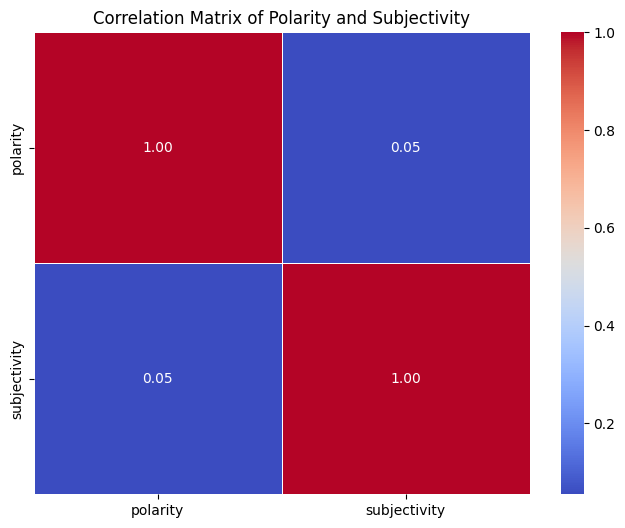

In [97]:
#Do a correlation matrix on polarity and subjectivity for descruption

import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Polarity and Subjectivity')
plt.show()

In [83]:
TextBlob(df["description"][79]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

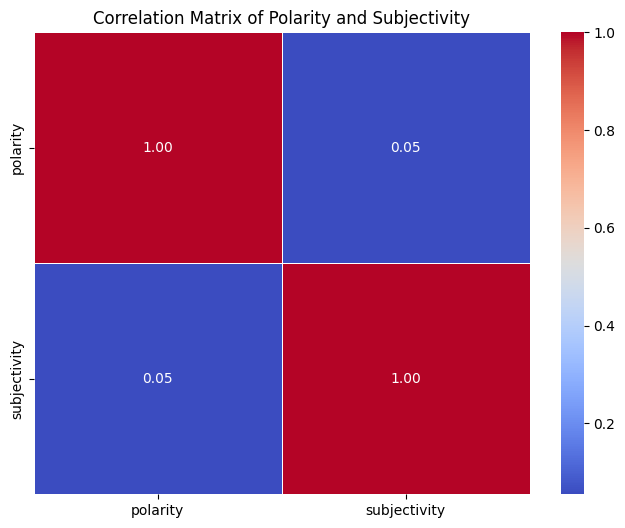

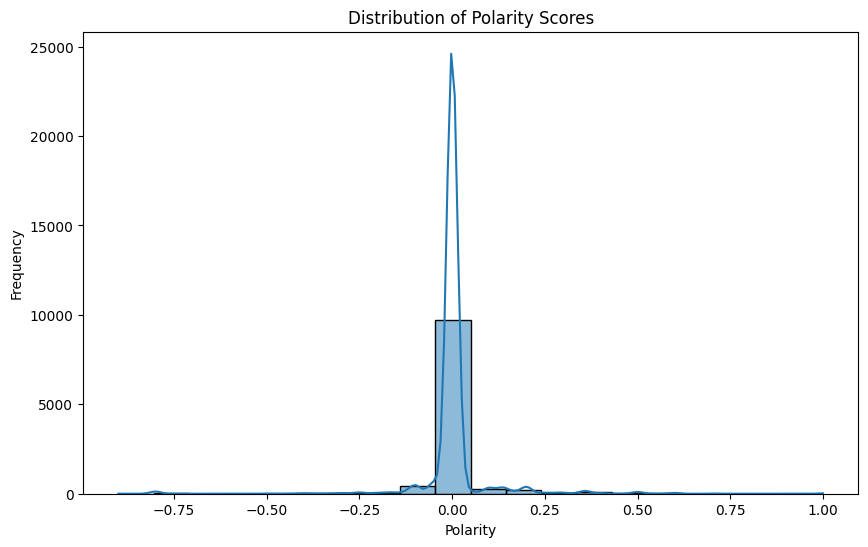

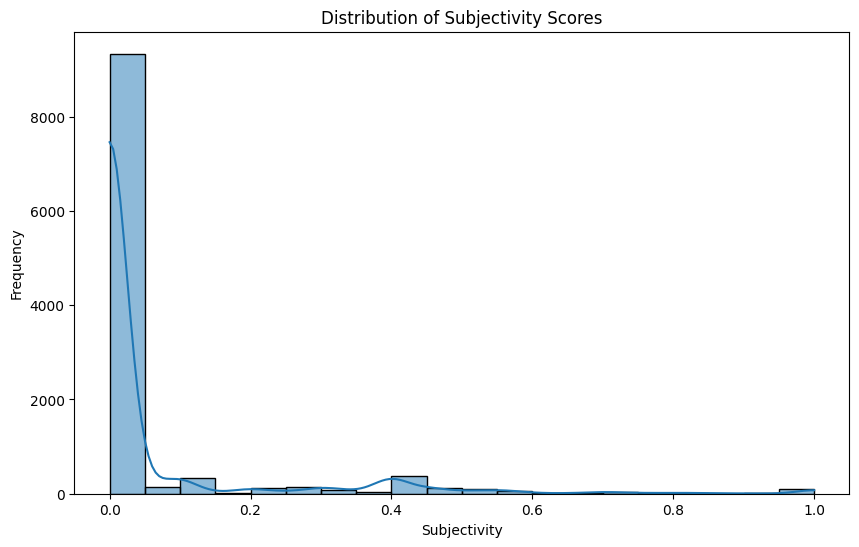

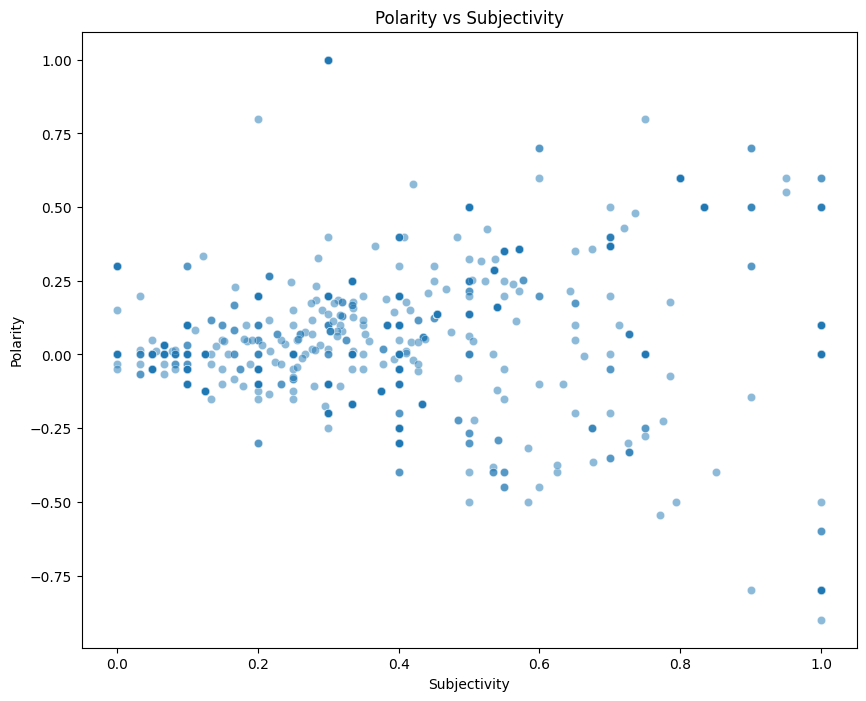

In [98]:
#  visualize the polarity and subjectively of the for their statistical relevant

# Calculate the correlation matrix
corr_matrix = df[['polarity', 'subjectivity']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Polarity and Subjectivity')
plt.show()

# Visualize the distribution of polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=20, kde=True)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of subjectivity
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=20, kde=True)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Polarity vs Subjectivity
plt.figure(figsize=(10, 8))
sns.scatterplot(x='subjectivity', y='polarity', data=df, alpha=0.5)
plt.title('Polarity vs Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()


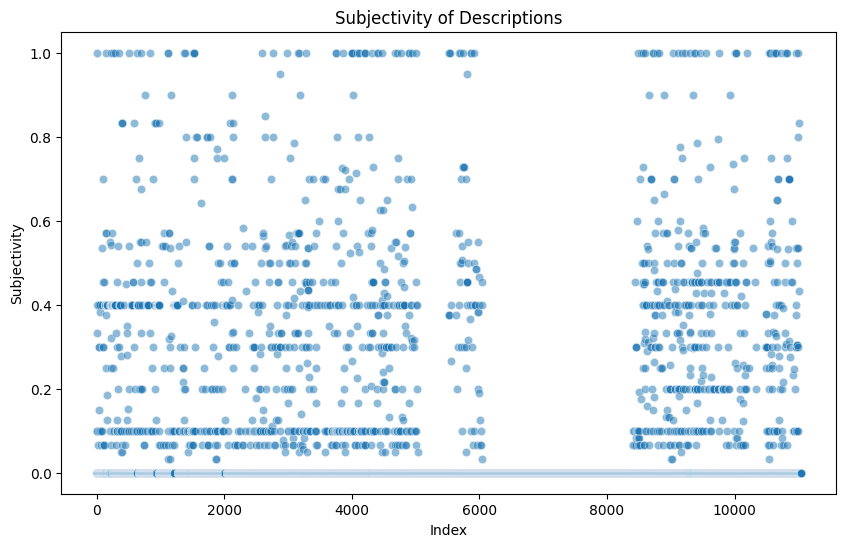

In [99]:
# prompt: scatter plot of subjectivity

# Scatter plot of Subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='subjectivity', data=df, alpha=0.5)
plt.title('Subjectivity of Descriptions')
plt.xlabel('Index')
plt.ylabel('Subjectivity')
plt.show()